In [1]:
#  引入文件

import sys
sys.path.append("../../code")
import logging
from Tusharedata.daily import load
import pandas as pd
import numpy as np

logging.basicConfig(level=logging.INFO)  # 设置日志级别


2021-05-14 22:55:37,716 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-05-14 22:55:37,717 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("data_cache")
2021-05-14 22:55:37,718 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-05-14 22:55:37,720 INFO sqlalchemy.engine.Engine COMMIT


In [2]:
# 预定义
from Tusharedata.lib import mas
code = "300059.SZ"
ma = 30
df = load(code)
mas(df,[5,10,20,30])
df.head()

2021-05-14 22:55:40,428 INFO sqlalchemy.engine.Engine BEGIN (implicit)
INFO:sqlalchemy.engine.Engine:BEGIN (implicit)
2021-05-14 22:55:40,435 INFO sqlalchemy.engine.Engine SELECT data_cache.id AS data_cache_id, data_cache."key" AS data_cache_key, data_cache.value AS data_cache_value 
FROM data_cache 
WHERE data_cache."key" = ?
 LIMIT ? OFFSET ?
INFO:sqlalchemy.engine.Engine:SELECT data_cache.id AS data_cache_id, data_cache."key" AS data_cache_key, data_cache.value AS data_cache_value 
FROM data_cache 
WHERE data_cache."key" = ?
 LIMIT ? OFFSET ?
2021-05-14 22:55:40,439 INFO sqlalchemy.engine.Engine [generated in 0.00347s] ('daily.300059.sz', 1, 0)
INFO:sqlalchemy.engine.Engine:[generated in 0.00347s] ('daily.300059.sz', 1, 0)
INFO:root:mas BEGIN
INFO:root:mas  END


,ts_code,date,open,high,low,close,pre_close,change,pct_chg,vol,amount,ma5,ma10,ma20,ma30
2645,300059.SZ,20100319,1.3124,1.3382,1.2485,1.2554,0.8731,0.3823,43.7865,197373.26,1.182394e+06,NaN,NaN,NaN,NaN
2644,300059.SZ,20100322,1.3146,1.3811,1.2965,1.3811,1.2554,0.1257,10.0127,110103.62,6.935957e+05,NaN,NaN,NaN,NaN
2643,300059.SZ,20100323,1.3555,1.4127,1.3451,1.4006,1.3811,0.0195,1.4119,85522.14,5.471359e+05,NaN,NaN,NaN,NaN
2642,300059.SZ,20100324,1.4024,1.5381,1.3907,1.4779,1.4006,0.0773,5.5191,72530.24,4.917786e+05,NaN,NaN,NaN,NaN
2641,300059.SZ,20100325,1.4777,1.5405,1.4635,1.5013,1.4779,0.0234,1.5833,60225.14,4.190101e+05,1.40326,NaN,NaN,NaN


In [36]:
# 计算收盘价与均线之间的差距

df["close_ma"] = df["close"]-df["ma"+str(ma)] / df["ma"+str(ma)]
max_abs_scaler = lambda x : 2*((x-np.min(x))/(np.max(x)-np.min(x)))-1

# 收盘价是否大于均线并归一化
df["signa0"] = (df["close"]>df["ma"+str(ma)]).astype(int)
df["signa0"] = df[["signa0"]].apply(max_abs_scaler) 

# 收盘价差价归一化 + 平方
df["signal1"] = df[["close_ma"]].apply(max_abs_scaler) 
df["signal1"] = np.square(df["signal1"])

# 计算最终买卖信号
df["signal"] = df["signal1"]

df


,ts_code,date,open,high,low,close,pre_close,change,pct_chg,vol,amount,ma5,ma10,ma20,ma30,close_ma,signa0,signal1,signal
2645,300059.SZ,20100319,1.3124,1.3382,1.2485,1.2554,0.8731,0.3823,43.7865,197373.26,1.182394e+06,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN
2644,300059.SZ,20100322,1.3146,1.3811,1.2965,1.3811,1.2554,0.1257,10.0127,110103.62,6.935957e+05,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN
2643,300059.SZ,20100323,1.3555,1.4127,1.3451,1.4006,1.3811,0.0195,1.4119,85522.14,5.471359e+05,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN
2642,300059.SZ,20100324,1.4024,1.5381,1.3907,1.4779,1.4006,0.0773,5.5191,72530.24,4.917786e+05,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN
2641,300059.SZ,20100325,1.4777,1.5405,1.4635,1.5013,1.4779,0.0234,1.5833,60225.14,4.190101e+05,1.40326,NaN,NaN,NaN,NaN,-1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,300059.SZ,20210510,30.1500,30.3000,29.5200,29.9900,30.1900,-0.2000,-0.6625,1376235.18,4.108786e+06,31.14200,31.079,29.7890,29.157333,28.99,1.0,0.256766,0.256766
3,300059.SZ,20210511,29.7100,30.9900,29.4000,30.6600,29.9900,0.6700,2.2341,1713750.31,5.172820e+06,30.87600,31.094,29.9170,29.277000,29.66,1.0,0.292495,0.292495
2,300059.SZ,20210512,30.2000,30.5300,30.0000,30.4600,30.6600,-0.2000,-0.6523,1135110.07,3.439102e+06,30.52000,30.981,30.0560,29.384667,29.46,1.0,0.281586,0.281586
1,300059.SZ,20210513,30.0000,30.9500,29.9200,30.5000,30.4600,0.0400,0.1313,1140028.75,3.466521e+06,30.36000,30.929,30.2385,29.464667,29.50,1.0,0.283751,0.283751


begin:None
end:None
signal:signal
initial:10000
end:{'date': '20210107', 'bmoney': 20820.0, 'count': 600, 'bprice': 34.7}
count:1
bandans:2718.0124799999976
free:46.30752000000004
          date   assets
0     20160104  10000.0
1     20160105  10000.0
2     20160106  10000.0
3     20160107  10000.0
4     20160108  10000.0
...        ...      ...
1294  20210510  17994.0
1295  20210511  18396.0
1296  20210512  18276.0
1297  20210513  18300.0
1298  20210514  20640.0

[1299 rows x 2 columns]
end... back_trading
/Users/admin/Documents/GitHub/UGFAFAFA/code/fitter/../../code/Analyse/back_trading.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["assets"] = assets


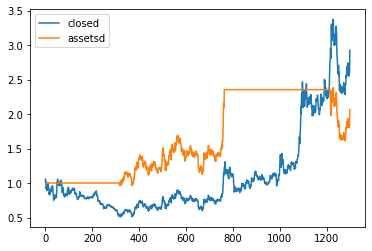

In [37]:
from Analyse.back_trading import back_trading
ef = df[df["date"]>"20160101"]
ef = back_trading(ef,buyfix=0.5, sellfix = 0.1)
ef[["date","signal","assets"]]

import matplotlib.pyplot as plt
ef["closed"] =  ef["close"]/(ef["close"].iloc[1])
ef["assetsd"] = ef["assets"] / (ef["assets"].iloc[1])
ef[["closed","assetsd"]].plot()
plt.show()

In [38]:
from chart.kline import kline
kline(ef, height="550px").render("/Users/admin/Documents/github/UGFAFAFA/data/tem/result.html")

SyntaxError: unmatched ')' (<ipython-input-38-4b0842ec16ae>, line 2)